<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# TS1: Síntesis de señales
**Alumna:** Agustina Rocío Paolini Rosso  
**Carrera:** Ingeniería Biomédica  
**Materia:** Análisis y Procesamiento de Señales  
**Fecha:** Agosto 2025  

## Consigna
1. Sintetizar y graficar:
   - Una señal sinusoidal de 2 kHz.  
   - La misma señal amplificada y desfasada en π/2.  
   - La misma señal modulada en amplitud por otra sinusoidal de la mitad de la frecuencia.  
   - La señal anterior recortada al 75% de su ~~potencia~~ amplitud.
   - Una señal cuadrada de 4 kHz.  
   - Un pulso rectangular de 10 ms.  

   En cada caso indicar: tiempo entre muestras, número de muestras y energía/potencia.  

2. Verificar la ortogonalidad entre la primera señal y las demás.  

3. Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.  

4. Demostrar la igualdad trigonométrica:
   $$
   2 \cdot \sin(\alpha)\cdot \sin(\beta) = \cos(\alpha-\beta)-\cos(\alpha+\beta) \tag{1}
   $$
   Mostrando que se cumple con señales sinusoidales para $(\alpha = \omega t)$ y $(\beta = \frac{\omega}{2}t)$.  

5. *Bonus*:   
   - Descargar un archivo `.wav` desde freesound.org, graficarlo y calcular su energía.  

## Introducción teórica

En el presente trabajo se busca comprender cómo se generan, representan y analizan distintas señales en un entorno digital. El estudio y la síntesis de estas mismas permite comprender cómo se comportan las formas de onda en sistemas reales.  

Al discretizar una señal continua se emplea una frecuencia de muestreo $f_s$, la cual determina el tiempo entre muestras $t_s = 1/f_s$ y la cantidad de datos que describen la señal. 

A partir de estas señales se calculan propiedades fundamentales, como la energía, si se trata de una señal de duración finita o no periódica, mediante:  
$$
E = \sum_{n=0}^{N-1} |x[n]|^2 \cdot t_s \tag{2}
$$
midiendo, así, la "cantidad de señal" contenida en un intervalo finito. A lo largo de este informe, para las señales generadas siempre se calculó la energía de las mismas, dado que son finitas al tomar un intervalo de tiempo determinado. 

Y la potencia, si se trabaja con señales periódicas o infinitas en el tiempo, empleando:  
$$
P = \frac{E}{N \cdot T_s} = \frac{1}{N}\sum_{n=0}^{N-1} |x[n]|^2 \tag{3}
$$
que mide el promedio de energía por unidad de tiempo de la señal.  

Asimismo, se estudia la ortogonalidad entre ellas, considerando que dos señales, $x(t)$ e $y(t)$, son ortogonales en un intervalo si su producto interno es cero:  
$$
\langle x, y \rangle = \int x(t)\,y(t)\,dt = 0
$$ 

En el caso discreto, se aproxima por:  
$$
\langle x, y \rangle \approx \sum x[n]\cdot y[n]\cdot t_s \approx 0 \tag{4}
$$

A su vez, se aplican conceptos de correlación y autocorrelación para analizar la similitud de una señal consigo misma o con otra en el tiempo. La correlación es una medida de similitud entre dos señales en función del desplazamiento temporal. Para señales muestreadas `x` e `y` en tiempo discreto se define como:
$$
R_{xy}[k]= \sum_{n=0}^{N-1} x[n]y[n + k] \cdot t_s \tag{5}
$$
donde $k$ es el desplazamiento entre número de muestras.

También se incluyen ejercicios de verificación de identidades trigonométricas con señales sinusoidales, lo cual permite conectar la teoría matemática con la práctica de síntesis de señales.

Finalmente, se incorpora un análisis aplicado sobre un archivo de audio real, en el que se grafica y calcula su energía, extendiendo los conceptos estudiados a un caso práctico.

---
## Análisis y desarrollo
En primer lugar, se estableció la frecuencia de muestreo `fs = 100000 1/s`, el tiempo entre muestras `ts = 10 μs` y una cantidad de muestras de `nn = 500` con el fin de logar un vector de tiempo `tt` de `5 ms`. Luego, se creó la función `grafico` para visualizar las señales a generar y se inició por la señal sinusoidal de `2 kHz` **(S1)**.

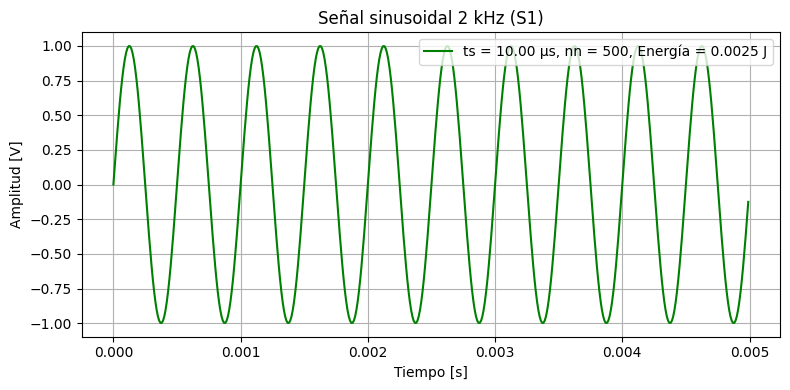

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

fs = 100000  # Frecuencia de muestreo
ts = 1/fs     # Tiempo entre muestras [s]
nn = 500      # Cantidad de muestras → duración total 5 ms
tt = np.arange(nn)*ts   # Vector de tiempo

# Función para graficar y mostrar ts, nn y energía
def grafico(x, y, titulo):
    E = np.sum(np.abs(y)**2) * ts  # Energía de la señal
    N = len(y)                     # Cantidad de muestras
    Ts = x[1]-x[0]                 # Tiempo entre muestras
    
    plt.figure(figsize=(8,4))
    line_hdls = plt.plot(x, y, 'g', label='Señal')
    plt.title(titulo)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.grid(True)
    
    # Información en la leyenda
    info_text = f"ts = {Ts*1e6:.2f} µs, nn = {N}, Energía = {E:.4f} J"
    plt.legend(line_hdls, [info_text], loc='upper right')
    
    plt.tight_layout()
    plt.show()


# Señal 1: sinusoidal 2 kHz
ff_1 = 2000  # Hz
sen_1 = np.sin(2*np.pi*ff_1*tt)
grafico(tt, sen_1, 'Señal sinusoidal 2 kHz (S1)')

La señal de frecuencia `ff_1 = 2000 Hz` tiene un período de   
$$
T = \frac{1}{ff_1} =  \frac{1}{2000 \, \text{Hz}} = 0.0005 \, \text{s} = 0.5 \, \text{ms}
$$

Por lo que en `tt = 5 ms`, se pueden observar  
$$
\frac{5 \, \text{ms}}{0.5 \, \text{ms}} = 10 \, \text{ciclos completos}
$$

Esto es ideal para analizar la señal ya que se tiene un número entero de ciclos, lo que facilita el cálculo de la energía y los posteriores análisis de ortogonalidad y correlación. Se observa, así, que la duración tomada para el vector `tt` es suficiente para mostrar varios ciclos completos de la señal, representándola correctamente, y reduce la cantidad de datos a estudiar.   

Además, cumpliendo con el Teorema de Nyquist-Shannon, la señal está muestrada adecuadamente, dado que la frecuencia de muestreo `fs` es amplimente superior al doble de la frecuencia de la señal `ff_1`. 

La función `grafico` muestra en forma de leyenda en el gráfico el tiempo entre muestras `ts`, la cantidad de muestras tomadas `nn` y la energía de la señal, que se calcula utilizando (2).

---
A continuación se generó la misma señal pero amplificada en `amp = 4 V` y desfasada en `ph = π/2`.

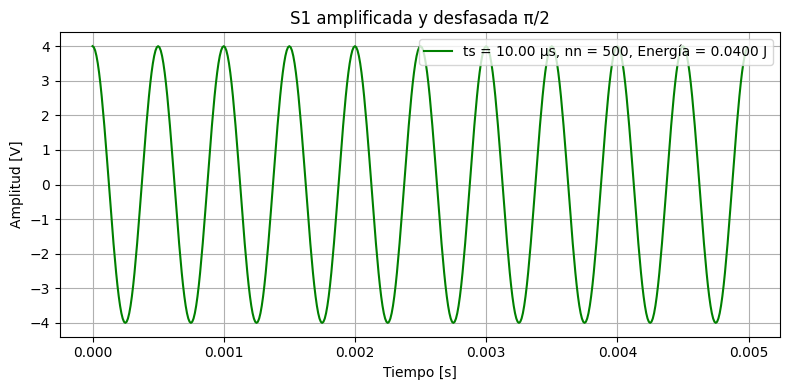

In [2]:
# Señal 2: amplificada y desfasada
sen_2 = 4*np.sin(2*np.pi*ff_1*tt + np.pi/2)
grafico(tt, sen_2, 'S1 amplificada y desfasada π/2')

La señal *S1* se ve amplificada por `4 V` y desplazada en el tiempo por su fase `π/2` haciendo que comience en un máximo en `tt = 0 s`, en lugar de un cero de la función.  La señal continúa teniendo la misma frecuencia de `2 KHz`, por lo que se pueden observar la misma cantidad de `10` ciclos.  

El tiempo entre muestras y la cantidad de muestras tomadas se mantiene igual, no obstante, la energía de la señal cambia de valor. Esto se debe a que, como se muestra en (2), la energía de una señal en tiempo discreto está relacionada con el cuadrado de la amplitud. Entonces, si la señal *S1* se multiplica por `4`, su energía también se multiplica por ese mismo factor al cuadrado.  

De esta forma, si la energía de *S1* era $E_1 = 0.0025 \, \text{J}$,  

$$
E_2 = (4^2)* E_1 = 16*0.0025 \, \text{J} = 0.0400 \, \text{J}
$$

Resultado que se observa en el gráfico.

Por otra parte, el desfase no modifica la energía de la señal, únicamente desplaza a la onda en el tiempo. 

---
Luego, se generó la señal *S1* modulada en amplitud por otra señal sinusoidal de frecuencia `ff_mod = 1000 Hz`.

La modulación en amplitud (AM) es un proceso mediante el cual la amplitud de una señal **portadora** se varía siguiendo la forma de otra señal, llamada señal **moduladora**. Esto permite transmitir información usando una frecuencia portadora específica, mientras que la señal moduladora contiene los datos que se quieren enviar.

La señal portadora, en discreto, se define como:  
$$
x_p(n) = A_p \cdot \sin(2\pi f_p n)
$$

Y la señal moduladora como:  
$$
x_m(n) = A_m \cdot \sin(2\pi f_m n)
$$

De esta forma, la señal modulada en amplitud se expresa como:
$$
x_{AM}(n) = (1 + k\cdot x_m(n)) \cdot x_p(n) \tag{6}
$$
donde $k$ es el índice de modulación ($0 < k \leq 1$).

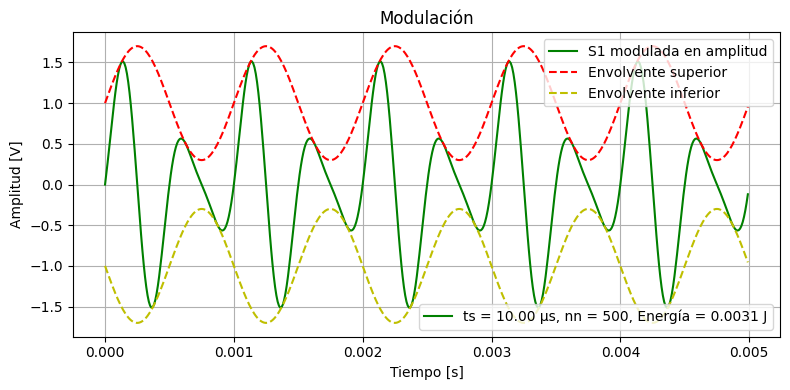

In [3]:
# Señal 3: modulada en amplitud
ff_mod = 1000  # Hz
m = 0.7        # índice de modulación (0 < m <= 1)
s_moduladora = np.sin(2*np.pi*ff_mod*tt)
sen_3 = (1 + m*s_moduladora) * sen_1
env_sup = (1 + m*s_moduladora)
env_inf = -(1 + m*s_moduladora)

plt.figure(figsize=(8,4))
E = np.sum(np.abs(sen_3)**2) * ts  # Energía de la señal 3
N = len(sen_3)                     # Cantidad de muestras
Ts = tt[1]-tt[0] 

# Graficar
line1, = plt.plot(tt, sen_3, 'g', label='S1 modulada en amplitud')
line2, = plt.plot(tt, env_sup, 'r--', label='Envolvente superior')
line3, = plt.plot(tt, env_inf, 'y--', label='Envolvente inferior')

# Info extra
info_text = f"ts = {Ts*1e6:.2f} µs, nn = {N}, Energía = {E:.4f} J"

# Primera leyenda (las señales)
legend1 = plt.legend([line1, line2, line3],
                     [line1.get_label(), line2.get_label(), line3.get_label()],
                     loc='upper right')
plt.gca().add_artist(legend1)  # fijar esta leyenda

# Segunda leyenda (info aparte)
plt.legend([line1], [info_text], loc='lower right')

plt.title('Modulación')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.tight_layout()
plt.show()


Al modular en amplitud *S1*, de frecuencia `ff_1 = 2000 Hz`, por otra señal sinusoidal de la mitad de la frecuencia, la amplitud de la señal portadora varía proporcionalmente según la amplitud de la señal moduladora. Si la señal moduladora es cero, la amplitud de la portadora se mantiene constante. Si la señal moduladora tiene una amplitud positiva, la amplitud de la portadora aumenta, y si tiene una amplitud negativa, la amplitud de la portadora disminuye. La señal *S1* mantiene su frecuencia, pero su amplitud varía lentamente siguiendo a la señal moduladora.  

Tomando de (6) el factor $1 + k\cdot x_m(n)$ se graficaron las señales envolventes superior e inferior para observar el efecto de la modulación y la forma que adopta la señal modulada.

Se observa que la energía de la señal modulada se modifica en relación a la señal *S1* original. Esto sucede porque, al utilizar (2),  
$$
E = \sum_{n=0}^{N-1} |x_{AM}[n]|^2 \cdot t_s = \sum_{n=0}^{N-1} (1 + k  x_m[n])^2|x_p[n]|^2 \cdot t_s 
$$

el factor $(1 + k x_m[n])^2$ modifica la amplitud de la portadora, por lo tanto, la energía total aumenta en comparación con la portadora original. Esta variación depende de la forma de la señal moduladora y del índice de modulación $k$.  

En este caso, la envolvente hace que la señal portadora tenga picos más altos que la original *S1*, aumentando la energía total.

---
Seguidamente, se recortó en amplitud esta señal modulada al `75%` de su energía. Luego de la modificación de la TS1, agregué el recorte de la señal al 75% de su amplitud. 

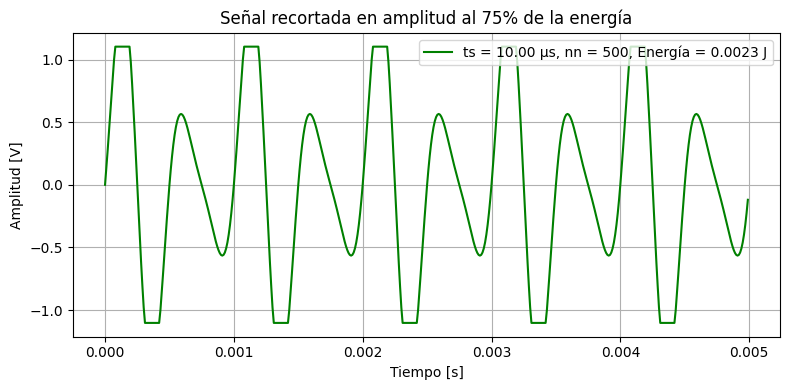

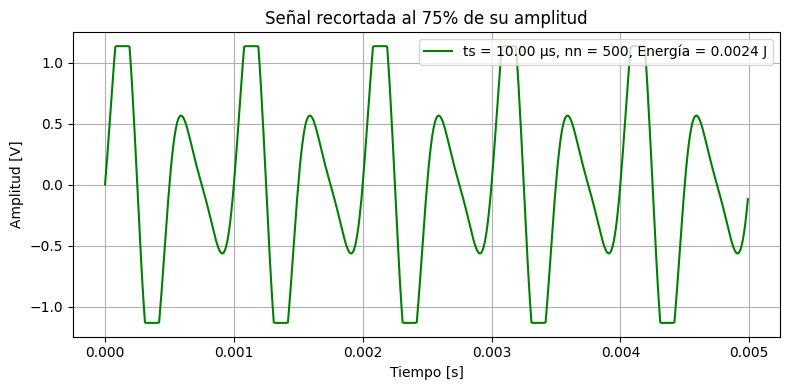

In [4]:
def recorte_energia(signal, ts, porcentaje=0.75):
    
    # Energía original
    E_orig = np.sum(np.abs(signal)**2) * ts
    E_obj = porcentaje * E_orig

    # Máxima amplitud de la señal
    max_amp = np.max(np.abs(signal))
    umbral = max_amp

    # Búsqueda iterativa del umbral
    for thresh in np.linspace(max_amp, 0, 2000):
        rec = np.clip(signal, -thresh, thresh)
        E_rec = np.sum(np.abs(rec)**2) * ts
        if E_rec <= E_obj:
            umbral = thresh
            break

    signal_rec = np.clip(signal, -umbral, umbral)
    return signal_rec, umbral


def recorte_por_amplitud(x, factor=0.75):
    A = np.max(np.abs(x))
    u = factor * A
    return np.clip(x, -u, u), u

sen_4, umbral = recorte_energia(sen_3,ts,0.75)
sen_4_modif, umbral_modif = recorte_por_amplitud(sen_3,0.75)
grafico(tt, sen_4, 'Señal recortada en amplitud al 75% de la energía')
grafico(tt, sen_4_modif, 'Señal recortada al 75% de su amplitud')

En primer lugar, en la función `recorte_energia` se calculó la energía de la señal modulada `sen_3` utilizando (2) y se fijó la energía objetivo al `75%` de la energía original. Luego, se buscó el umbral de amplitud: recorriendo desde la amplitud absoluta máxima hacia abajo todos los posibles valores de recorte, se aplicó un *clipping* a la señal para cada valor y se calculó a cada paso la energía de la señal recortada `E_rec`. Cuando esta última es menor que la energía objetivo, se guardó el valor del umbral encontrado y finalizó el bucle, obteniendo, así, la señal recortada en amplitud en función de la energía de la señal al 75% de la original.

Teóricamente, la energía de una señal está vinculada con la suma de los cuadrados de sus amplitudes, como se observa en (2). Al aplicar un *clipping* y recortar los picos de la señal, se eliminan partes de la señal que aportan más energía, pues los valores grandes al cuadrado aportan en mayor medida al resultado final de la energía. Reduciendo el umbral es posible bajar la energía total de la señal al porcentaje deseado. De esta forma, la forma de la onda queda "aplanada" en las zonas de mayor amplitud y se conserva la parte central de la señal sin cambios.

- *Luego de modificación de TS1* 

En la función `recorte_por_amplitud` se aplicó un *clipping* tomando como umbral el 75% de la amplitud máxima de la señal modulada `sen_3`. Así, todos los valores de la señal mayores a ese umbral se reemplazan por el valor obtenido, "aplastando" esos picos, y se mantiene la forma de la señal para la mayoría de los valores.

Observamos que la energía de ambas señales `sen_4` y `sen_4_modif` toma valores similares a pesar de utilizar dos métodos distintos. Al recortar en amplitud al 75% inevitablemente se reduce la energía de la señal, ya que al aplanar los picos de la señal disminuye el área bajo $|x(t)|^2$. Como se trata de una señal "suave", como lo es un seno, ambas operaciones dan valores similares de energía. 

---
Luego, se generó una señal cuadrada de `4000 Hz`.

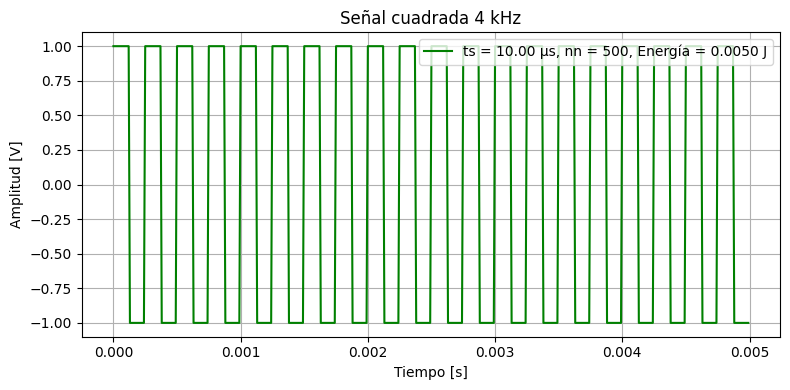

In [5]:
# Señal 5: cuadrada 4 kHz
ff_2 = 4000  # Hz
sen_5 = signal.square(2*np.pi*ff_2*tt)
grafico(tt, sen_5, 'Señal cuadrada 4 kHz')

Con su frecuencia de `ff_2 = 4000 Hz`, la señal cuadrada tiene un período de:  
$$
T_{cuad} = \frac {1}{4000 \, \text{Hz}} = 0.00025 \, \text {s} = 0.25 \, \text{ms}
$$

Por lo que en `5 ms` son observables:  
$$
\frac {5 \, \text{ms}}{0.25 \, \text{ms}} = 20 \,  \text{ciclos completos}
$$
tal como se ve en el gráfico.

En relación a la energía, la amplitud de una señal cuadrada es siempre constante, excepto en los instantes de transición. En este caso, la amplitud absoluta de la señal es siempre `1`. Si comparamos con la energía de la señal sinusoidal *S1* de frecuencia `ff_1 = 2000 Hz` que tiene el mismo valor de amplitud, observamos que la energía de esta señal cuadrada es el doble de la energía de *S1*. Esto sucede porque, al utilizar la ecuación (2) para una señal sinusoidal, la energía se promedia a la mitad de la amplitud al cuadrado, es decir, 

$$
E_{sin} = \frac {A^2 \cdot T}{2}
$$
donde $T$ es la duración total de la señal. La señal sinusoidal pasa por cero en cada ciclo, por lo que su energía total es la mitad de la máxima posible.

Mientras que la señal cuadrada en este caso, que se expresa como:  
$$
sen_5 = \pm 1 \, \text{V}
$$

Utilizando (2), su energía viene dada por: 
$$
E_{cuad} = A^2 \cdot T
$$
es decir, mantiene la amplitud máxima todo el tiempo, por eso su energía es el doble que la sinusoidal de misma amplitud y duración.

---
Para finalizar el primer punto, se generó un pulso rectangular de `10 ms`. Con el fin de poder visualizarlo, se creó otro vector de tiempo `tt_pulso` de una duración de `15 ms`. 

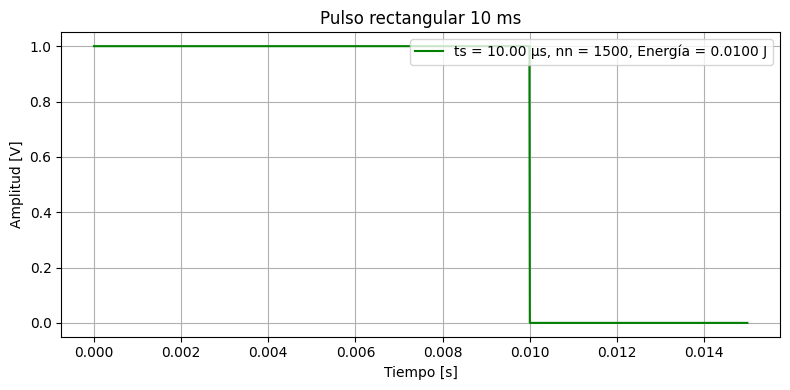

In [6]:
# Señal 6: pulso rectangular 10 ms

nn_pulso = int(15e-3*fs)   # número total de muestras dado 15 ms
tt_pulso = np.arange(nn_pulso)*ts   # vector de tiempo

sen_6 = np.zeros_like(tt_pulso)    # creo vector de igual longitud
n_pulso = int(10e-3*fs)            # duración del pulso = 10 ms
sen_6[:n_pulso] = 1                # vale 1 en esos 10 ms

grafico(tt_pulso, sen_6, 'Pulso rectangular 10 ms')

Un pulso rectangular es una señal que vale una amplitud constante durante un intervalo de tiempo definido y luego vuelve a cero. Puede expresarse como:
$$
x(t) =
\begin{cases}
A, & 0 \le t < tt \\
0, & \text{en otro caso}
\end{cases}
$$
donde $A$ es la amplitud del pulso y $tt$ la duración del pulso. En este caso, $A = 1 V$ y $tt = 10 ms$.

Observamos que aumenta el número de muestras tomadas `nn` porque se tomó un vector de tiempo mayor a la duración del pulso para poder visualizarlo gráficamente. No obstante, para el pulso de `10 ms` se tomaron
$$
n_{pulso} = 0.01 \, \text{s} \cdot 100000 \frac{1}{\text s} = 1000 \, \text{muestras}
$$

Por eso, al utilizar (2) para el cálculo de la energía, se observa que cada uno de los $n_{pulso}$ términos de la suma aporta $1 \cdot t_s$ al resultado final, por lo tanto, se obtiene:
$$
E_{pulso} = n_{pulso} \cdot t_s = 1000 \cdot 0.00001 \text{s} = 0.01 \, \text{J}
$$

---
Continuando con el segundo punto, se buscó verficar la ortogonalidad entre la primera señal *S1* y las demás. Para ello se definió la siguiente función:

In [7]:
def prod_interno(s1, s2, ts, n1, n2, tol=1e-10):
    
    # Producto interno con np.dot
    p_int = np.dot(s1, s2) * ts

    if np.abs(p_int) < tol:
        print(f'Las señales {n1} y {n2} son ortogonales.')
    else:
        print(f'Las señales {n1} y {n2} NO son ortogonales.')


# Verificar ortogonalidad
prod_interno(sen_1, sen_2, ts, 'S1', 'S2', 1e-10)
prod_interno(sen_1, sen_3, ts, 'S1', 'S3', 1e-10)
prod_interno(sen_1, sen_4, ts, 'S1', 'S4', 1e-10)
prod_interno(sen_1, sen_4_modif, ts, 'S1', 'S4 modif', 1e-10)
prod_interno(sen_1, sen_5, ts, 'S1', 'S5', 1e-10)
prod_interno(sen_1, sen_6[:len(sen_1)], ts, 'S1', 'Pulso', 1e-10)

Las señales S1 y S2 son ortogonales.
Las señales S1 y S3 NO son ortogonales.
Las señales S1 y S4 NO son ortogonales.
Las señales S1 y S4 modif NO son ortogonales.
Las señales S1 y S5 son ortogonales.
Las señales S1 y Pulso son ortogonales.


Tomando la definición de ortogonalidad (4), se calculó el producto interno entre la primera señal y las otras y, estableciendo una tolerancia pequeña de `tol = 1e-10`, se analizaron los resultados obtenidos. Si el producto interno es aproximadamente cero, entonces las señales son ortogonales. 

Desde el punto de vista teórico, la ortogonalidad aparece cuando las señales tienen frecuencias distintas, múltiplos adecuados o desfaces especiales, y no aparece cuando se modula o recorta una señal, ya que se cambia la forma de la onda. 

En el caso del análisis entre *S1* y *S2*, la segunda señal tiene la misma frecuencia pero amplitud y fase distinta. Dos senos con misma frecuencia pero con un desfase de `π/2` son ortogonales:
$$
\int_0^T \sin(\omega t)\cdot \sin(\omega t + \pi/2) dt = 0
$$

Entre *S1* y *S3* no hay ortogonalidad porque la tercera señal es la modulación en amplitud de la original. Al multiplicar en la expresión del producto interno, aparecen componentes a `1000 Hz` y a `3000 Hz` por la propiedad de la modulación:
$$
\sin(2000t) \cdot \sin(1000t) = \frac{1}{2} [\cos(1000t) - \cos(3000t)]
$$
Por lo tanto, el producto interno con *S1* no es cero.

Al recortar la señal al 75% de su amplitud o de su energía para obtener *S4 modif* o *S4*, respectivamente, cambia la forma de la señal, agregando distorsión, por lo que el producto interno es distinto de cero.

Entre *S1* y la señal cuadrada de `4 kHz` hay ortogonalidad. Esto sucede porque la señal cuadrada puede representarse como una serie de Fourier de senos impares.
$$
\text{cuadrada}(4 \, \text{kHz}) = \frac{4}{\pi} \sum_{k = 1,3,5...}^{\infty} \frac{1}{k} \sin(2\pi k \cdot 4 \, \text{kHz} \cdot t)
$$

Como *S1* tiene una frecuencia de `2 KHz`, no coincide con ninguna frecuencia de la serie sobre el intervalo usado, por lo que el producto interno es cero.

Finalmente, `S6[:len(S1)]` corta el pulso de `10 ms` para que tenga la misma longitud que la señal *S1*. El producto interno entre ambas señales puede aproximarse a cero si el pulso está alineado de forma que las áreas positivas y negativas del seno se cancelan, por lo que son ortogonales. 

---
Luego, se graficó la autocorrelación y correlación de las señales:

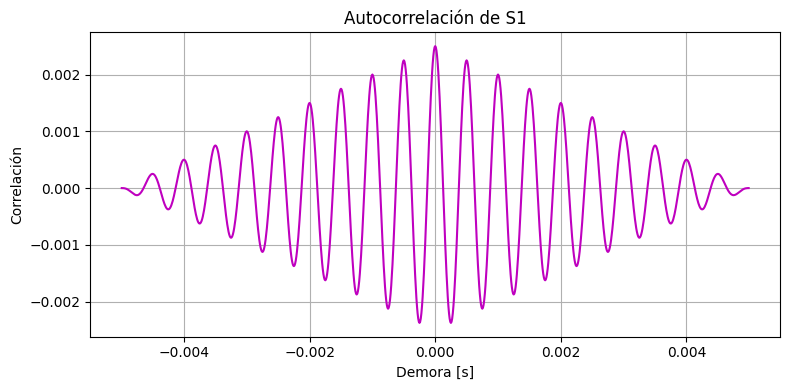

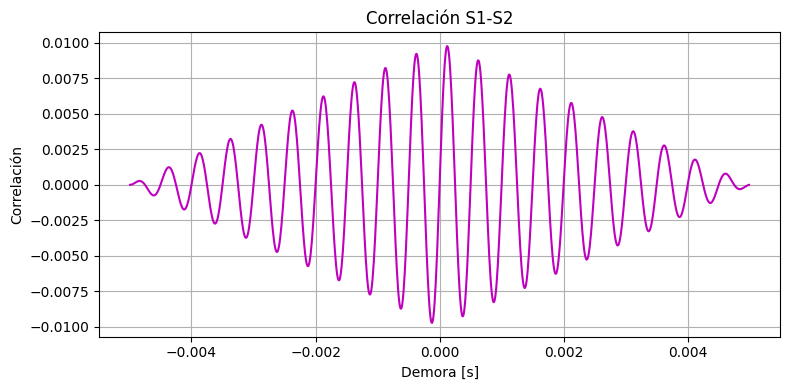

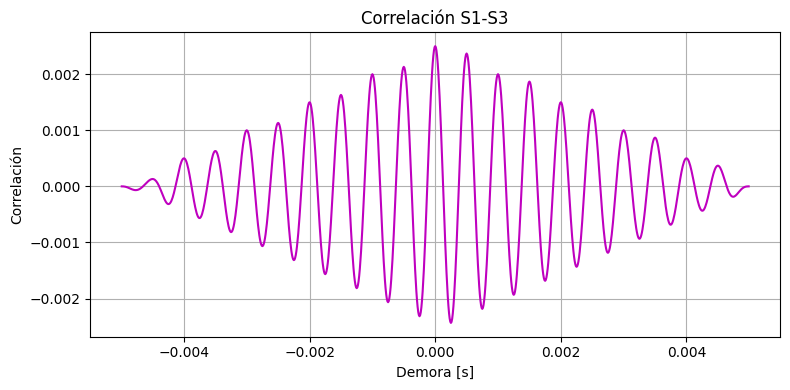

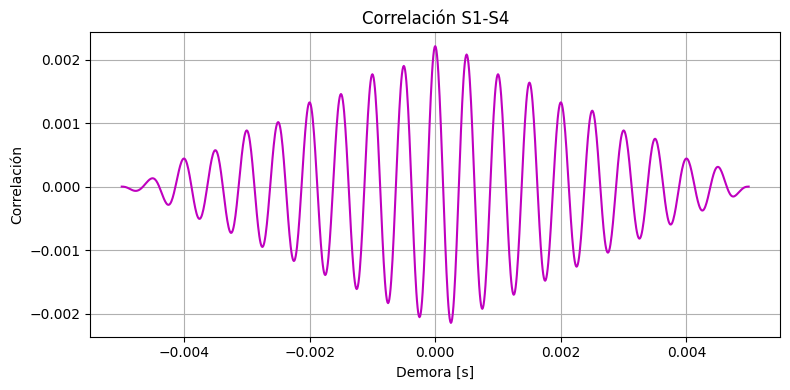

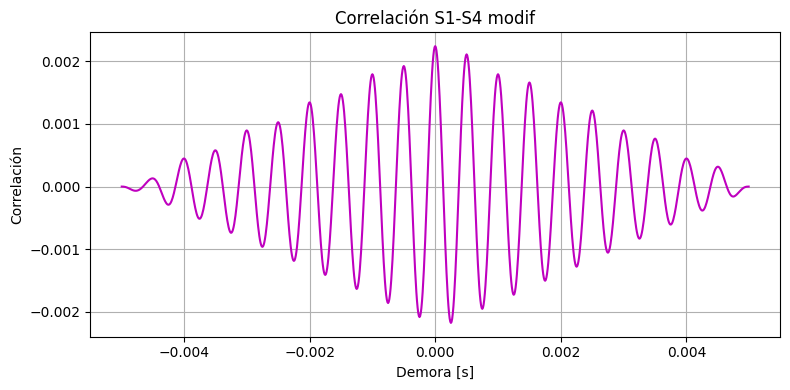

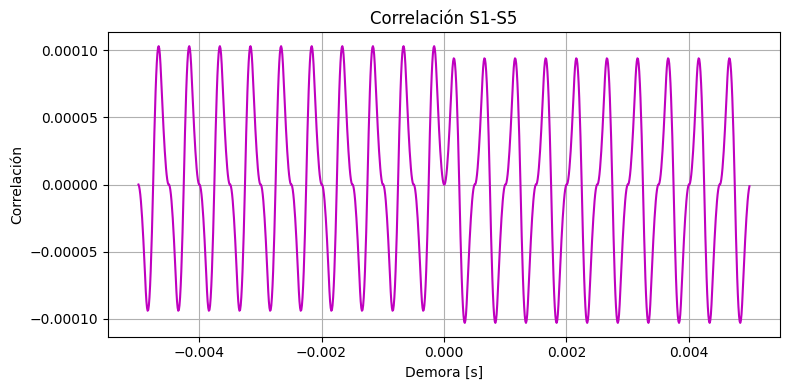

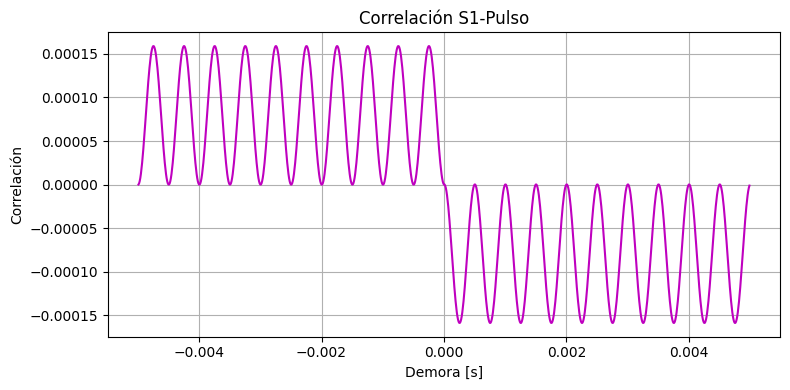

In [9]:
def correlacion(x, y, titulo):
    corr = np.correlate(x, y, mode='full') * ts
    lags = np.arange(-len(x)+1, len(x)) * ts
    
    plt.figure(figsize=(8,4))
    plt.plot(lags, corr, 'm')
    plt.title(titulo)
    plt.xlabel('Demora [s]')
    plt.ylabel('Correlación')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Autocorrelación de S1
correlacion(sen_1, sen_1, 'Autocorrelación de S1')

# Correlación entre S1 y las demás
correlacion(sen_1, sen_2, 'Correlación S1-S2')
correlacion(sen_1, sen_3, 'Correlación S1-S3')
correlacion(sen_1, sen_4, 'Correlación S1-S4')
correlacion(sen_1, sen_4_modif, 'Correlación S1-S4 modif')
correlacion(sen_1, sen_5, 'Correlación S1-S5')
correlacion(sen_1, sen_6[:len(sen_1)], 'Correlación S1-Pulso')

La función `correlacion` calcula la autocorrelación de la señal *S1* y la correlación cruzada entre ésta y las demás. La autocorrelación mide la similitud de la señal consigo misma, mientras que la correlación cruzada mide la similitud entre dos señales distintas para todas las posibles demoras. Esta operación es una versión generalizada del producto interno, que permite ver similitudes aunque haya un desplazamiento temporal. De esta forma, el máximo de correlación indica el desfase donde las señales coinciden más.

Observamos que, al comparar la señal *S1* consigo misma, se obtiene un máximo en la demora `0` y una forma periódica con la frecuencia de la señal. Matemáticamente, si se observa (5), el máximo se encuentra en `k = 0`, es decir, se obtiene la expresión de la energía de la señal:
$$
R_{xx}[0] = \sum_{n=0}^{N-1} x[n] \cdot x[n + 0] \cdot t_s =  \sum_{n=0}^{N-1} x[n]^2 \cdot t_s \approx E
$$

Esto implica que la energía de la señal se concentra en el punto máximo de autocorrelación ya que, al no haber desfase (`k = 0`), hay máxima superposición de las señales y se obtiene la máxima energía aparente. 

Al comparar *S1* con *S2*, como son señales similares con una amplitud diferente y un desplazamiento en fase, el pico de correlación máxima está desplazado del tiempo `0`. Son señales muy relacionadas, ya que poseen la misma frecuencia pero la diferencia de fase les hace perder alineación. En la correlación cruzada con la señal modulada *S3* se observa un patrón similar que en la autocorrelación, con algunas ondulaciones en los picos. Esto sucede porque la señal *S1* es la señal portadora en *S3*, no obstante, al introducir la modulación, se reduce la energía coincidente entre ellas, variando la amplitud de la señal y, en consecuencia, el patrón de correlación.  

En la correlación cruzada de *S4* como de *S4 modif* se observan patrones similares. El gráfico es similar al de autocorrelación, pero de amplitud ligeramente más pequeña. Al recortar la señal modulada que, como se explicó antes, tiene de portadora a *S1*, se introduce distorsión y elimina parte de la energía de la señal, lo que disminuye la correlación. En relación a la correlación con *S5*, se ven valores cercanos al cero, sin picos claros. No hay coincidencias entre la señal sinusoidal y la señal cuadrada, por lo que casi no hay correlación. 

Finalmente, en la correlación con el pulso *S6* se ve una oscilación, por un lado positiva, que ocurre cuando el pulso se solapa con el seno, tomando los valores positivos, y por el otro, negativa, donde el pulso cubre crestas y valles del seno, haciendo que la correlación disminuya. 

---
Luego, se demostró la propiedad trigonométrica (1):
$$
2 \cdot \sin(\alpha)\cdot \sin(\beta) = \cos(\alpha-\beta)-\cos(\alpha+\beta)
$$

Reescribo el seno con la forma exponencial de Euler:
$$
\sin\theta = \frac{e^{i\theta}-e^{-i\theta}}{2i}
$$

Sustituyo en el miembro izquierdo:
$$
2\sin\alpha\ \sin\beta = 2(\frac{e^{i\alpha}-e^{-i\alpha}}{2i})(\frac{e^{i\beta}-e^{-i\beta}}{2i})
$$

$$
2\sin\alpha\ \sin\beta = 2\frac{(e^{i\alpha}-e^{-i\alpha})(e^{i\beta}-e^{-i\beta})}{-4}
$$

Desarrollo el producto del numerador:
$$
(e^{i\alpha}-e^{-i\alpha})(e^{i\beta}-e^{-i\beta}) = e^{i\alpha}e^{i\beta} -e^{i\alpha}e^{-i\beta} - e^{-i\alpha}e^{i\beta} + e^{-i\alpha}e^{-i\beta}
$$

Combino exponentes:
$$
e^{i(\alpha+\beta)} - e^{i(\alpha-\beta)} - e^{i(-\alpha+\beta)} + e^{-i(\alpha+\beta)}
$$

Como $e^{i(-\alpha+\beta)}=e^{-i(\alpha-\beta)}$, entonces:
$$
(e^{i\alpha}-e^{-i\alpha})(e^{i\beta}-e^{-i\beta}) = e^{i(\alpha+\beta)} - e^{i(\alpha-\beta)} - e^{-i(\alpha-\beta)} + e^{-i(\alpha+\beta)}
$$

Sustituyendo en el numerador:
$$
2\sin\alpha\ \sin\beta = -\frac{1}{2}(e^{i(\alpha+\beta)} - e^{i(\alpha-\beta)} -e^{-i(\alpha-\beta)} + e^{-i(\alpha+\beta)})
$$

La forma exponencial del coseno es:
$$
\cos \theta=\frac{e^{i \theta}+e^{-i \theta}}{2}
$$

Agrupo los términos con $(\alpha + \beta)$:
$$
e^{i(\alpha+\beta)}+e^{-i(\alpha+\beta)}=2\cos(\alpha+\beta)
$$

Agrupo los términos con $(\alpha - \beta)$:
$$
-e^{i(\alpha-\beta)}-e^{-i(\alpha-\beta)}=-2\cos(\alpha-\beta)
$$

Así, puedo reescribir:
$$
2\sin\alpha\,\sin\beta = -\frac{1}{2}\Big(\underbrace{e^{i(\alpha+\beta)}+e^{-i(\alpha+\beta)}}_{2\cos(\alpha+\beta)} - \underbrace{\big(e^{i(\alpha-\beta)}+e^{-i(\alpha-\beta)}\big)}_{2\cos(\alpha-\beta)}\Big)
$$

Sustituyo las identidades del coseno y simplifico:
$$
2\sin\alpha\,\sin\beta = -\frac{1}{2}\Big(2\cos(\alpha+\beta)-2\cos(\alpha-\beta)\Big) = -\cos(\alpha+\beta) + \cos(\alpha-\beta)
$$

Finalmente, 
$$
2\sin\alpha\,\sin\beta = \cos(\alpha-\beta)-\cos(\alpha+\beta)
$$

A continuación, se verificó numéricamente la misma identidad trigonométrica utilizando señales sinusoidales y definiendo $\alpha = \omega t$ y $\beta = \frac{\omega}{2}t$, con una frecuencia de `f = 1000 Hz`.

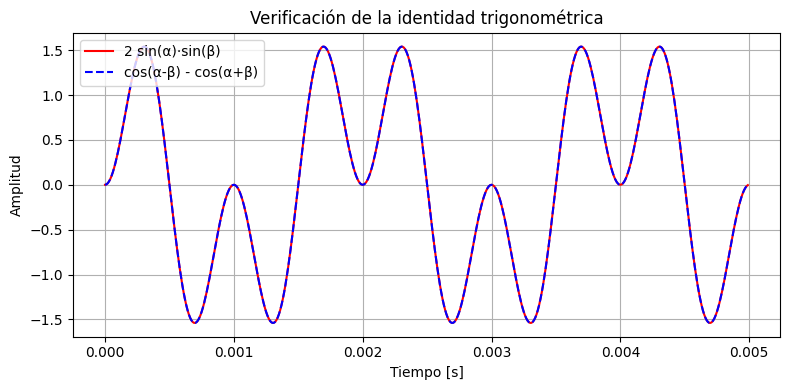

In [10]:
# Demostración:
# 2 sin(α) sin(β) = cos(α-β) - cos(α+β)

w = 2*np.pi*1000   # w = 2πf
alpha = w*tt       # α = ω·t
beta = (w/2)*tt    # β = ω/2·t   (la mitad de α)

lhs = 2*np.sin(alpha)*np.sin(beta)          # lado izquierdo
rhs = np.cos(alpha-beta) - np.cos(alpha+beta)  # lado derecho

plt.figure(figsize=(8,4))
plt.plot(tt, lhs, 'r', label='2 sin(α)·sin(β)')
plt.plot(tt, rhs, 'b--', label='cos(α-β) - cos(α+β)')
plt.legend()
plt.title('Verificación de la identidad trigonométrica')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.tight_layout()
plt.show()

La superposición de las curvas confirma que la igualdad trigonométrica se cumple para los valores tomados de $\alpha$ y $\beta$. 

### Bonus
Para finalizar, se leyó un archivo en formato `.wav` y se representó gráficamente su forma de onda en el dominio del tiempo.

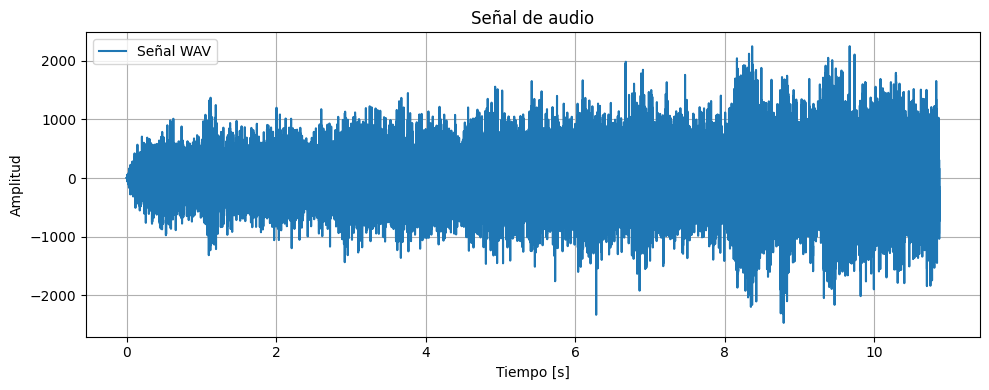

Energía de la señal de audio = 23139.64


In [11]:
# Leer archivo wav
fs, data = wavfile.read("ambiente.wav") 

# Si el archivo tiene 2 canales (stereo), uso solo uno
if data.ndim > 1:
    data = data[:,0]

# Vector de tiempo
tt_audio = np.arange(len(data)) / fs

# Graficar señal
plt.figure(figsize=(10,4))
plt.plot(tt_audio, data, label="Señal WAV")
plt.title("Señal de audio")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular energía (sumatoria |x|^2 * Ts)
ts_audio = 1/fs
energia = np.sum(np.abs(data)**2) * ts_audio
print(f"Energía de la señal de audio = {energia:.2f}")

El muestreo devuelve un vector `data` con los valores de amplitud digitalizados a la frecuencia de muestreo `fs`. Si el archivo es estéreo (tiene 2 canales), se toma solamente uno de ellos para simplificar. A partir de la señal, utilizando (2), se calcula le energía. 

El valor obtenido de la energía es grande porue se suma el cuadrado de miles o millones de muestras obtenidas del audio. Esta cantidad, a su vez, depende de la duración del archivo, es decir, cuanto más largo el audio, mayor será la energía. Asimismo, las amplitudes digitales de los archivos de tipo `.wav` suelen ser enteros de `16 bits` (`-32768` a `32767`), y al elevarlas al cuadrado se generan números muy grandes. 

Para comparar señales relativas se suele normalizar la señal entre `-1` y `1` dividiendo cada muestra por $2^{15} = 32768$, haciendo que la energía sea adimensional y más manejable. No obstante, para comparaciones más directas entre audios de distinta duración, suele calcularse la potencia promedio, utilizando (3).

La unidad de la energía depende de la representación de la señal. En el caso de señales analógicas, si se sabe que $x(t)$ es una tensión en $[V]$ aplicada sobre una resistencia de referencia $R$ que, por convención, suele tomarse $R = 1 \Omega$, la energía queda expresada en Joules ($J$), pues
$$
V^2 \cdot s = \frac{J}{\Omega} = J \quad \text{si} \quad R = 1 \Omega
$$
En el caso de señales digitales, como archivos `.wav`, los valores no representan un voltaje real, sino una escala arbitraria, por lo que son adimensionales y la energía calculada también es adimensional. Si se conoce la calibración del conversor A/D, es posible convertir la señal a $[V]$ y expresar la energía en Joules, suponiendo $R = 1 \Omega$. 

A lo largo de este trabajo, dado que las señales del primer punto fueron generadas por código, las unidades de energía a mostrar dependían de la interpretación de la amplitud. Como utilicé `V` en las amplitudes de las señales, la energía quedó expresada en Joules. 

## Conclusión
En este trabajo se logró sintetizar y analizar diversas señales en un entorno digital, comprendiendo sus propiedades fundamentales de manera práctica y teórica. Se observó cómo la amplitud, el desfase, la modulación y el recorte afectan tanto la forma de la onda como su energía, confirmando que la energía está directamente relacionada con el cuadrado de la amplitud y que la potencia refleja la energía promedio en señales periódicas.

La verificación de ortogonalidad permitió identificar cuándo dos señales no comparten componentes en común en un intervalo determinado, destacando la importancia de la frecuencia y el desfase para el diseño de sistemas de comunicaciones y procesamiento de señales. Asimismo, el análisis de correlación y autocorrelación mostró cómo se puede cuantificar la similitud entre señales.

La demostración de la identidad trigonométrica mediante la forma exponencial y la verificación numérica con señales sinusoidales mostró la coherencia entre teoría matemática y práctica digital. Finalmente, el análisis de un archivo de audio real permitió aplicar los conceptos de energía y muestreo en un contexto práctico, resaltando la relación entre duración, amplitud digitalizada y magnitudes físicas de las señales.

En síntesis, el trabajo integró teoría, síntesis digital y análisis práctico de señales, brindando una comprensión completa de cómo se representan, manipulan y estudian en sistemas de procesamiento de señales y comunicaciones.

## Reflexión personal
Durante la realización de este trabajo aprendí mucho sobre la síntesis y el análisis de señales digitales, como diversas funciones incorporadas en las librerías `scipy` o `numpy`, que permiten generar ondas de distintas formas, recortar señales, calcular el producto interno y verificar correlación. No obstante, hay conceptos que todavía me cuestan, especialmente la correlación. Pude ver cómo la energía y la potencia se relacionan con la amplitud de la señal, cómo el desfase y la modulación cambian la forma de la onda, y cómo el recorte afecta la energía total. Todo esto me ayudó a entender mejor cómo se comportan las señales en un entorno digital.

En cuanto a la correlación y autocorrelación, aunque ahora sé que sirven para medir la similitud entre señales y detectar desfases, todavía me resulta un poco abstracto imaginar cómo se traduce eso en los gráficos y en los cálculos. Creo que necesito practicar más con ejemplos concretos para ver realmente cómo el producto interno y los desplazamientos afectan la correlación.

En general, este trabajo me permitió unir teoría y práctica: pude generar señales, medir su energía, verificar ortogonalidad, y aplicar fórmulas matemáticas en Python, lo que me ayuda a entender mejor la importancia de cada concepto en el análisis de señales y su aplicación en la vida real, como en audio o comunicaciones.

Para los comandos de formato estilo Markdown y LaTex utilicé las fuentes proporcionadas por la cátedra en el documento *notebook0*. Con el objetivo de profundizar en los contenidos teóricos recurrí a la bibliografía recomendada (*Thomas Holton - Digital Signal Processing*) y para la modulación consulté el Capítulo 3 de *Communication Systems by Simon Haykin*. Utilicé ChatGPT para algunos comandos de LaTex, como las llaves en la demostración de la identidad trigonométrica, algunos comandos de Python, como la inclusión del archivo `.wav` en el programa, y para reforzar los contenidos teóricos con el fin de obtener una explicación más clara. 